<H1><B>MULTIPLE LINEAR REGRESSION: ADDITIONAL MEDICAL CHARGES<B></H1>


In [1]:
#Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor

#sklearn modules for Model Selection--------------------------------------

from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import average_precision_score
import sys 
from termcolor import colored as cl

#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix

<h2>Exploratory Data Analysis</h2>

<b>Create a dataframe and evaluate the necessary columns for analysis.</b>
<br>Creates df dataframe.</br>

In [2]:
df = pd.read_csv('medical_clean.csv')

In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


Drop variables that are not continuous.

In [4]:
df.drop(['CaseOrder','Customer_id', 'Interaction', 'UID','Area', 'City','State', 'County', 'Zip', 'Lat', 'Lng', 'Population',
         'Services','HighBlood', 'Stroke', 'Complication_risk','Arthritis', 'Diabetes','Overweight',
         'Complication_risk','Arthritis','Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
         'TimeZone', 'Job','Marital','Gender', 'Soft_drink','BackPain','Anxiety', 'Diabetes','Hyperlipidemia',
         'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8',
         'Initial_admin','ReAdmis'], axis=1, inplace=True)

In [5]:
df.head() #dataframe with continuous variables

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
0,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420
1,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120
2,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460
3,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350
4,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786


In [6]:
#Explore dataset
df.info() # Obtain features of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   VitD_levels         10000 non-null  float64
 4   Doc_visits          10000 non-null  int64  
 5   Full_meals_eaten    10000 non-null  int64  
 6   vitD_supp           10000 non-null  int64  
 7   Initial_days        10000 non-null  float64
 8   TotalCharge         10000 non-null  float64
 9   Additional_charges  10000 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 781.4 KB


In [7]:
print("Number of categorical features : {}".format(len(df.select_dtypes(include=['object']).columns)))
print("Number of numerical features : {}".format(len(df.select_dtypes(include=['int64', 'float64']).columns)))

Number of categorical features : 0
Number of numerical features : 10


In [8]:
# print missing values
print("Missing values (per feature): \n{}\n".format(df.isnull().sum()))

Missing values (per feature): 
Children              0
Age                   0
Income                0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64



In [9]:
df.nunique() # Determine unique data values of the columns

Children                11
Age                     72
Income                9993
VitD_levels           9976
Doc_visits               9
Full_meals_eaten         8
vitD_supp                6
Initial_days          9997
TotalCharge           9997
Additional_charges    9418
dtype: int64

<h2><b>Data Preparation</b></h2>

<h3><b>Variable Selection </b></h3>
<br>Clean data and select variables for MLR.</br>

<h3><b>DATA DICTIONARY</b></h3>
<br>The 5 independent variables in the multiple linear regression model will be:</br> 
<li>Age - continuous</li>
<li>Full_meals_eaten  - continuous</li>
<li>Additional_charges<b>- Target Variable</b></li>

<b><h4>Model Building:</h4></b>

In [10]:
X = df.drop('Additional_charges',axis=1) # Independet variable
y = df['Additional_charges'] # dependent variable

In [11]:
sm_X1_var = sm.add_constant(X)

mlr_model = sm.OLS(y, sm_X1_var)
mlr_reg = mlr_model.fit()

<b><h4>Model Equation:</b></h4>

In [12]:
print(cl(mlr_reg.summary(), attrs = ['bold']))

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     1293.
Date:                Mon, 04 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:01:45   Log-Likelihood:                -98187.
No. Observations:               10000   AIC:                         1.964e+05
Df Residuals:                    9990   BIC:                         1.965e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6610.7156    571.081  

Remove all variables with p-values greater than 0.05.

In [13]:
df.drop(['TotalCharge','Initial_days','VitD_levels','vitD_supp','Income','Children','Doc_visits'], axis=1, inplace=True) 

In [14]:
X = df.drop('Additional_charges',axis=1) # Independet variable
y = df['Additional_charges'] # dependent variable
sm_X1_var = sm.add_constant(X)

mlr_model = sm.OLS(y, sm_X1_var)
mlr_reg = mlr_model.fit()

In [15]:
print(cl(mlr_reg.summary(), attrs = ['bold']))

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     5287.
Date:                Mon, 04 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:01:52   Log-Likelihood:                -98442.
No. Observations:               10000   AIC:                         1.969e+05
Df Residuals:                    9997   BIC:                         1.969e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              693.7901    134.283  

<b><h2>Model Validation:</b></h2>
<br>Validate MLR Assumptions</br>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

In [17]:
print(cl('Root Mean Squared Error:',attrs = ['bold']), r2_score(y_test,yhat))
print(cl('Mean Absolute Error:', attrs = ['bold']), mean_absolute_error(y_test,yhat))
print(cl('Mean Squared Error:', attrs = ['bold']), mean_squared_error(y_test,yhat))
print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

Root Mean Squared Error: 0.5067750823995067
Mean Absolute Error: 4177.952689084147
Mean Squared Error: 20707705.27347601
R-Squared : 0.5067750823995067


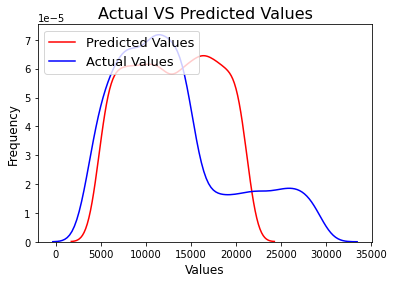

In [18]:
sns.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual VS Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

<b>Test Model for Linearity & Residual Normality

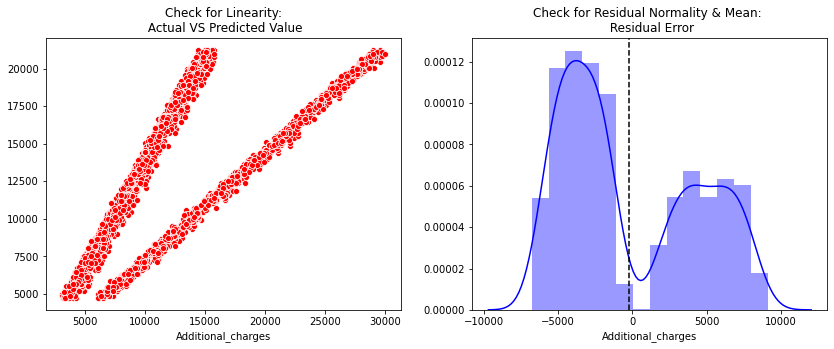

In [19]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,yhat,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual VS Predicted Value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - yhat),ax=ax,color='b')
ax.axvline((y_test - yhat).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual Normality & Mean: \n Residual Error');

<b>Test Model for Multivariate Normality and Homoscedasticity

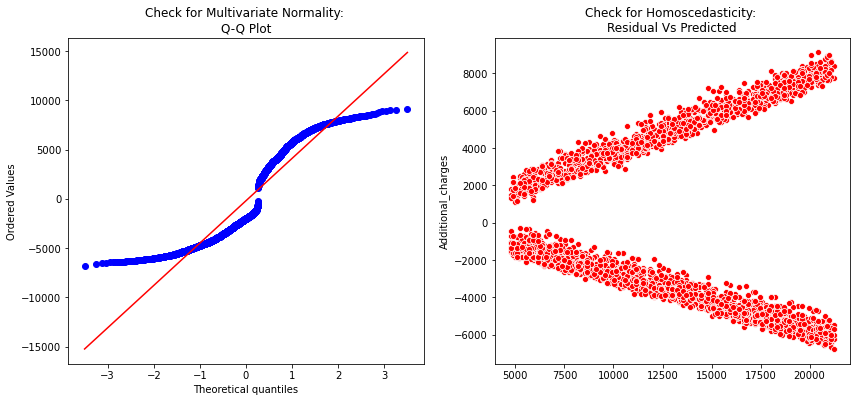

In [20]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
_,(_,_,r)= sp.stats.probplot((y_test -yhat),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - yhat), x=yhat, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

<b>Test for Collinearity of variables

In [21]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]

    return(vif)

df2 = df[['Age','Full_meals_eaten']]
calc_vif(df2)

,variables,VIF
0,Age,1.770695
1,Full_meals_eaten,1.770695


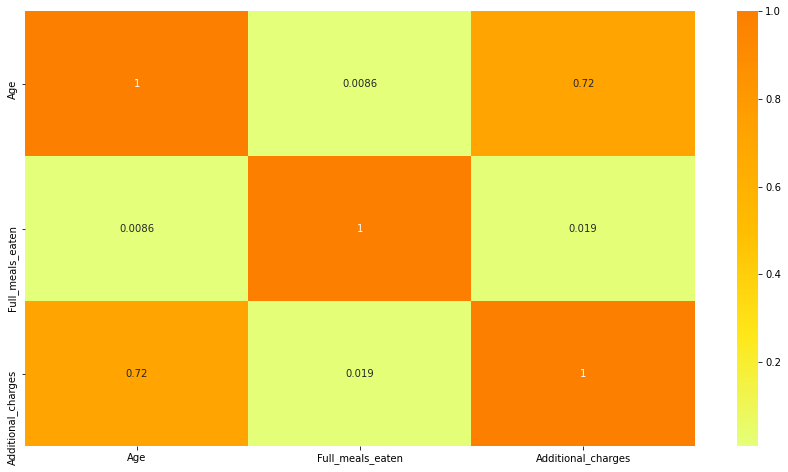

In [22]:
# correlation plot
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), cmap = 'Wistia', annot= True);

There are no collinearity relationships among the independent variables.

<b><h2>Model Equation:</b></h2>

In [23]:
#The coefficient of all independent variable are as follows
coeff = pd.DataFrame(lr.coef_, X_train.columns, columns=['coefficient'])
print ('Intercept =', lr.intercept_)
coeff

Intercept = 643.9273726075771


,coefficient
Age,228.667481
Full_meals_eaten,112.024035
